# Data Wrangling: Running Results

Analyze results of [https://valentinslauf.de/Ergebnisse-Fotos/](https://valentinslauf.de/Ergebnisse-Fotos/) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
df = pd.read_csv(
    "results_10km.csv",
    encoding="iso8859-1",
    skiprows=2,
    sep=";",
    index_col=0
)
df.columns = ['start_no', 'pair_name', 'name1', 'name2', 'cat', 'rank_cat', 'time', 'lag']
df.index.name = 'id'
df = df.iloc[:-2]
df

,start_no,pair_name,name1,name2,cat,rank_cat,time,lag
id,,,,,,,,
1,86.0,Je t'aime,Eric,Steven,Herren,1.0,0:34:32,NaN
2,36.0,Kaffeeklatsch,Karen,Patrick,mixed,1.0,0:40:58,0:06:26
3,63.0,Stralau Runners,Jonathan,Mark,Herren,2.0,0:41:26,0:06:54
4,5.0,Spuartzgis,Ryan,Timothy,mixed,2.0,0:42:21,0:07:49
5,117.0,Doodle Runners,Anthony,Vanessa,mixed,3.0,0:42:31,0:07:59
...,...,...,...,...,...,...,...,...
113,97.0,Pentis,Alex,Robert,mixed,85.0,1:23:32,0:49:00
114,69.0,Forever Friends,Cindy,Grace,Damen,13.0,1:24:59,0:50:27
115,108.0,Long Distance Lovers,Raymond,Brent,Damen,14.0,1:27:16,0:52:44


## Anonymize the data

The data contains personal information as defined by the GDPR. All participants have agreed that their data is to be shared. This however does not include redistribution by third parties. Therefore, the data must be anonymized.

In [ ]:
!pip install faker

In [8]:
from faker import Faker

f = Faker()

In [46]:
def anonymize(s: str) -> str:
    """anonymizes a string"""
    if type(s) == str and s not in ["", "MCL", "NaN", "Kristian"]:
        return f.first_name()
    return s

In [52]:
# in pandas, a df consists of pd.Series (one for each column)
# the output of a Series in Jupyter is in monospace font
df['name1'] = df['name1'].apply(anonymize)

## What is Tidy Data?

According to [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham (2014), in tidy data:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

(Codds 3rd normal form)


## Tidy Data Checklist

Don'ts:

* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.


## Inspect data types

In [56]:
# convert data types
df['start_no'] = df['start_no'].astype(int)
df['rank_cat'] = df['rank_cat'].astype(int)

In [57]:
df.dtypes

start_no      int64
pair_name    object
name1        object
name2        object
cat          object
rank_cat      int64
time         object
lag          object
dtype: object

## Convert time to a time data type

In [60]:
import time
from datetime import datetime

In [68]:
df['time'] = pd.to_timedelta(df['time'])

In [66]:
# same as
df['time'] = df['time'].apply(
    lambda x: pd.to_timedelta(x)
)

id
1     0 days 00:34:32
2     0 days 00:40:58
3     0 days 00:41:26
4     0 days 00:42:21
5     0 days 00:42:31
            ...      
113   0 days 01:23:32
114   0 days 01:24:59
115   0 days 01:27:16
116   0 days 01:36:03
117   0 days 01:43:53
Name: time, Length: 117, dtype: timedelta64[ns]

Text(0.5, 0, 'time to finish [min]')

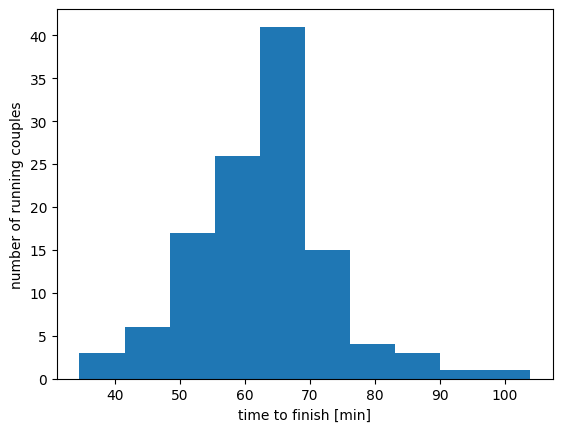

In [79]:
(df['time'].astype(int) / (60 * 1000_000_000)).plot.hist(bins=10)
plt.ylabel('number of running couples')
plt.xlabel('time to finish [min]')

In [58]:
df.head()

,start_no,pair_name,name1,name2,cat,rank_cat,time,lag
id,,,,,,,,
1,86,Je t'aime,Eric,Steven,Herren,1,0:34:32,NaN
2,36,Kaffeeklatsch,Karen,Patrick,mixed,1,0:40:58,0:06:26
3,63,Stralau Runners,Jonathan,Mark,Herren,2,0:41:26,0:06:54
4,5,Spuartzgis,Ryan,Timothy,mixed,2,0:42:21,0:07:49
5,117,Doodle Runners,Anthony,Vanessa,mixed,3,0:42:31,0:07:59


## Replace values

In [93]:
df['cat'].value_counts()

mixed     87
women     14
men       11
single     5
Name: cat, dtype: int64

In [86]:
# df['cat'] == "Herren" creates a boolean mask

In [88]:
# selection
# df[df['cat'] == "Herren"]

In [91]:
df["cat"].replace({
    "Herren": "men",
    "Damen": "women",
    "Einzel": "single"
}, inplace=True
) # returns None with inplace=True, otherwise returns copy

<AxesSubplot: >

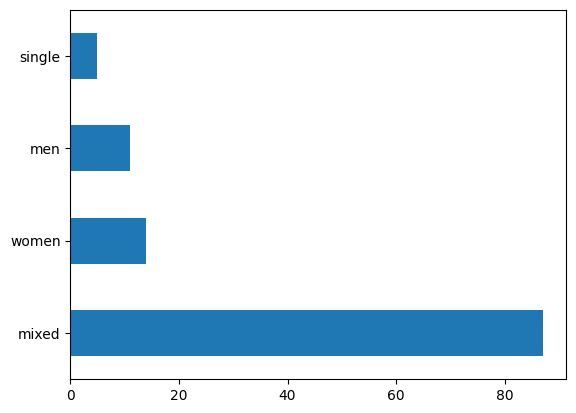

In [92]:
df['cat'].value_counts().plot.barh()

## What to put in the index of a DataFrame?

rule of thumb:

* column labels -> y axis label
* row index -> x axis label

In [97]:
df_cat = df.set_index('cat')  # moves column into index
df_cat.loc["single"]          # selection is easier now

,start_no,pair_name,name1,name2,rank_cat,time,lag
cat,,,,,,,
single,52,Norma & Micha,Erik,Karen,1,0 days 00:47:10,0:12:38
single,30,Martini,Nathan,Joshua,2,0 days 00:54:09,0:19:37
single,46,Best Sisters,Christine,Monica,3,0 days 00:56:09,0:21:37
single,301,NaN,Michael,NaN,4,0 days 00:57:47,0:23:15
single,307,NaN,Nicholas,NaN,5,0 days 01:05:29,0:30:57


In [104]:
# MultiIndex (index of 2+ features)
df_cat2 = df.sort_values(by=['cat', 'rank_cat']).set_index(['cat', 'rank_cat'])
df_cat2.head()

start_no        pair_name     name1   name2            time  \
cat rank_cat                                                                
men 1               86        Je t'aime      Eric  Steven 0 days 00:34:32   
    2               63  Stralau Runners  Jonathan    Mark 0 days 00:41:26   
    3                6       HBS Berlin   Natalie  Cheryl 0 days 00:49:52   
    4               51           HippHo     Kevin   Kevin 0 days 00:51:22   
    5               24           Topete    Amanda  Robert 0 days 00:51:46   

                  lag  
cat rank_cat           
men 1             NaN  
    2         0:06:54  
    3         0:15:20  
    4         0:16:50  
    5         0:17:14

In [100]:
df_cat2.loc[("women", 5)]  # multiple selection

/tmp/ipykernel_372776/929510386.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_cat2.loc[("women", 5)]


,,start_no,pair_name,name1,name2,time,lag
cat,rank_cat,,,,,,
women,5,32,Die Running Gags,Tyler,Richard,0 days 01:02:25,0:27:53


In [106]:
df_cat.reset_index() # inserts a index starting from 0

,cat,start_no,pair_name,name1,name2,rank_cat,time,lag
0,men,86,Je t'aime,Eric,Steven,1,0 days 00:34:32,NaN
1,mixed,36,Kaffeeklatsch,Karen,Patrick,1,0 days 00:40:58,0:06:26
2,men,63,Stralau Runners,Jonathan,Mark,2,0 days 00:41:26,0:06:54
3,mixed,5,Spuartzgis,Ryan,Timothy,2,0 days 00:42:21,0:07:49
4,mixed,117,Doodle Runners,Anthony,Vanessa,3,0 days 00:42:31,0:07:59
...,...,...,...,...,...,...,...,...
112,mixed,97,Pentis,Alex,Robert,85,0 days 01:23:32,0:49:00
113,women,69,Forever Friends,Cindy,Grace,13,0 days 01:24:59,0:50:27
114,women,108,Long Distance Lovers,Raymond,Brent,14,0 days 01:27:16,0:52:44
115,mixed,41,Loveparade,Johnny,Kenneth,86,0 days 01:36:03,1:01:31


## Methods to fill missing values

<AxesSubplot: >

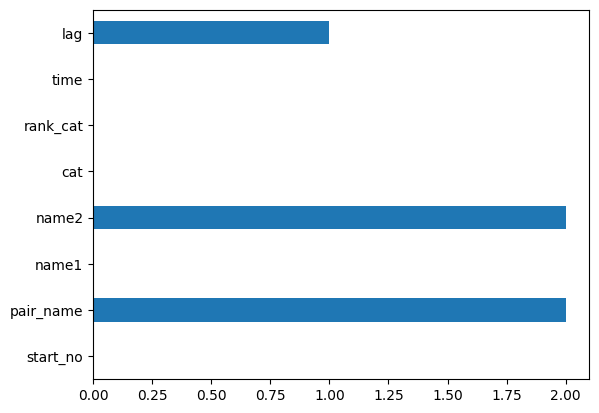

In [109]:
# start with this!
df.isna().sum().plot.barh()

In [114]:
df['name2'].fillna("unknown", inplace=True)
df['pair_name'].fillna("unknown", inplace=True)
df['lag'].fillna("0:00:00", inplace=True)

In [115]:
# problem with filling missing numbers

In [133]:
df['minutes'] = df['time'].astype(int) / (60 * 1000_000_000)
df.loc[['10', '53', '113', '7', '77'], 'minutes'] = None

In [129]:
# usually bad
# df['minutes'].fillna(0, inplace=True)

In [130]:
# sometimes it works, not good here
#df['minutes'].fillna(df['minutes'].mean(), inplace=True)

In [135]:
# works here: interpolation or take adjacent value
df['minutes'].fillna(method='ffill', inplace=True)

<AxesSubplot: xlabel='id'>

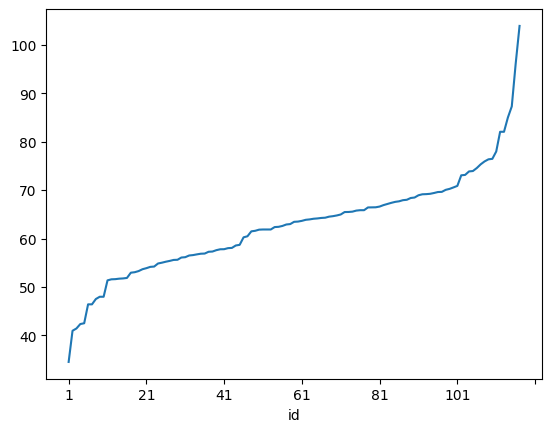

In [136]:
df['minutes'].plot()